## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  81.789629  1272.292341  0.352969  3.662552  1.561730
1  36.874749   429.041223  0.903700  6.418155  1.416151
2   8.887090   967.531189  0.195010  3.238342  1.538985
3  62.829015   521.318183  0.254843  8.976661  1.197192
4  68.567997  1357.192438  0.020034  3.005026  0.234456


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.96104 | train_mse: 6.64075 | train_mae: 1.94129 |  0:00:00s
epoch 1  | loss: 0.84573 | train_mse: 13.76626| train_mae: 2.61265 |  0:00:00s
epoch 2  | loss: 0.35861 | train_mse: 7.15524 | train_mae: 1.92957 |  0:00:00s


epoch 3  | loss: 0.58608 | train_mse: 3.97705 | train_mae: 1.49758 |  0:00:00s
epoch 4  | loss: 0.47328 | train_mse: 3.11586 | train_mae: 1.32646 |  0:00:00s
epoch 5  | loss: 0.41063 | train_mse: 3.35943 | train_mae: 1.38693 |  0:00:00s


epoch 6  | loss: 0.22094 | train_mse: 4.16334 | train_mae: 1.50938 |  0:00:00s
epoch 7  | loss: 0.26248 | train_mse: 3.4559  | train_mae: 1.32973 |  0:00:00s
epoch 8  | loss: 0.25388 | train_mse: 2.35023 | train_mae: 1.02463 |  0:00:00s


epoch 9  | loss: 0.34053 | train_mse: 1.15541 | train_mae: 0.77104 |  0:00:00s
epoch 10 | loss: 0.51484 | train_mse: 0.67986 | train_mae: 0.61517 |  0:00:01s
epoch 11 | loss: 0.39296 | train_mse: 0.5407  | train_mae: 0.56619 |  0:00:01s


epoch 12 | loss: 0.31641 | train_mse: 0.55849 | train_mae: 0.61452 |  0:00:01s
epoch 13 | loss: 0.39451 | train_mse: 0.43037 | train_mae: 0.52818 |  0:00:01s
epoch 14 | loss: 0.33144 | train_mse: 0.57373 | train_mae: 0.56021 |  0:00:01s


epoch 15 | loss: 0.32187 | train_mse: 0.61671 | train_mae: 0.55748 |  0:00:01s
epoch 16 | loss: 0.27538 | train_mse: 0.50628 | train_mae: 0.49255 |  0:00:01s
epoch 17 | loss: 0.20914 | train_mse: 0.67491 | train_mae: 0.54078 |  0:00:01s


epoch 18 | loss: 0.17669 | train_mse: 0.66315 | train_mae: 0.54701 |  0:00:01s
epoch 19 | loss: 0.11705 | train_mse: 0.68025 | train_mae: 0.58325 |  0:00:01s
epoch 20 | loss: 0.21692 | train_mse: 0.72975 | train_mae: 0.59085 |  0:00:01s
epoch 21 | loss: 0.10594 | train_mse: 0.59185 | train_mae: 0.50482 |  0:00:01s


epoch 22 | loss: 0.13737 | train_mse: 0.49077 | train_mae: 0.45584 |  0:00:01s
epoch 23 | loss: 0.1407  | train_mse: 0.32881 | train_mae: 0.38443 |  0:00:01s
epoch 24 | loss: 0.10131 | train_mse: 0.38879 | train_mae: 0.43824 |  0:00:02s
epoch 25 | loss: 0.10727 | train_mse: 0.43569 | train_mae: 0.46721 |  0:00:02s


epoch 26 | loss: 0.13925 | train_mse: 0.44939 | train_mae: 0.46155 |  0:00:02s
epoch 27 | loss: 0.1731  | train_mse: 0.46042 | train_mae: 0.46445 |  0:00:02s
epoch 28 | loss: 0.13489 | train_mse: 0.2616  | train_mae: 0.35659 |  0:00:02s
epoch 29 | loss: 0.25253 | train_mse: 0.12892 | train_mae: 0.27028 |  0:00:02s


epoch 30 | loss: 0.18209 | train_mse: 0.19636 | train_mae: 0.32174 |  0:00:02s
epoch 31 | loss: 0.11879 | train_mse: 0.26021 | train_mae: 0.37317 |  0:00:02s
epoch 32 | loss: 0.11072 | train_mse: 0.19033 | train_mae: 0.31355 |  0:00:02s


epoch 33 | loss: 0.07853 | train_mse: 0.11232 | train_mae: 0.25088 |  0:00:02s
epoch 34 | loss: 0.24184 | train_mse: 0.11043 | train_mae: 0.25137 |  0:00:02s
epoch 35 | loss: 0.15625 | train_mse: 0.10002 | train_mae: 0.24905 |  0:00:02s


epoch 36 | loss: 0.20554 | train_mse: 0.10744 | train_mae: 0.25423 |  0:00:02s
epoch 37 | loss: 0.09472 | train_mse: 0.09319 | train_mae: 0.23891 |  0:00:02s
epoch 38 | loss: 0.17723 | train_mse: 0.08955 | train_mae: 0.2396  |  0:00:03s
epoch 39 | loss: 0.22192 | train_mse: 0.13976 | train_mae: 0.27641 |  0:00:03s


epoch 40 | loss: 0.14917 | train_mse: 0.09776 | train_mae: 0.24843 |  0:00:03s
epoch 41 | loss: 0.32115 | train_mse: 0.10671 | train_mae: 0.25113 |  0:00:03s
epoch 42 | loss: 0.09679 | train_mse: 0.1096  | train_mae: 0.24993 |  0:00:03s
epoch 43 | loss: 0.40305 | train_mse: 0.10896 | train_mae: 0.24869 |  0:00:03s


epoch 44 | loss: 0.09856 | train_mse: 0.10446 | train_mae: 0.24421 |  0:00:03s
epoch 45 | loss: 0.16284 | train_mse: 0.1122  | train_mae: 0.24977 |  0:00:03s
epoch 46 | loss: 0.12143 | train_mse: 0.10008 | train_mae: 0.23732 |  0:00:03s
epoch 47 | loss: 0.08172 | train_mse: 0.07713 | train_mae: 0.2124  |  0:00:03s


epoch 48 | loss: 0.08789 | train_mse: 0.07335 | train_mae: 0.20532 |  0:00:03s
epoch 49 | loss: 0.08844 | train_mse: 0.07562 | train_mae: 0.21065 |  0:00:03s
epoch 50 | loss: 0.10843 | train_mse: 0.0838  | train_mae: 0.21889 |  0:00:03s
epoch 51 | loss: 0.16878 | train_mse: 0.11373 | train_mae: 0.25516 |  0:00:03s


epoch 52 | loss: 0.08234 | train_mse: 0.13795 | train_mae: 0.27536 |  0:00:03s
epoch 53 | loss: 0.23857 | train_mse: 0.14415 | train_mae: 0.26951 |  0:00:04s
epoch 54 | loss: 0.18604 | train_mse: 0.09283 | train_mae: 0.23566 |  0:00:04s
epoch 55 | loss: 0.09625 | train_mse: 0.07855 | train_mae: 0.22045 |  0:00:04s


epoch 56 | loss: 0.10192 | train_mse: 0.07616 | train_mae: 0.21549 |  0:00:04s
epoch 57 | loss: 0.11196 | train_mse: 0.07539 | train_mae: 0.21601 |  0:00:04s
epoch 58 | loss: 0.11489 | train_mse: 0.06643 | train_mae: 0.19755 |  0:00:04s
epoch 59 | loss: 0.16468 | train_mse: 0.07896 | train_mae: 0.20966 |  0:00:04s


epoch 60 | loss: 0.13283 | train_mse: 0.06788 | train_mae: 0.19989 |  0:00:04s
epoch 61 | loss: 0.10887 | train_mse: 0.06818 | train_mae: 0.20274 |  0:00:04s
epoch 62 | loss: 0.45207 | train_mse: 0.08486 | train_mae: 0.23354 |  0:00:04s


epoch 63 | loss: 0.15795 | train_mse: 0.09321 | train_mae: 0.24817 |  0:00:04s
epoch 64 | loss: 0.11715 | train_mse: 0.08025 | train_mae: 0.23178 |  0:00:04s
epoch 65 | loss: 0.10195 | train_mse: 0.09057 | train_mae: 0.23967 |  0:00:04s
epoch 66 | loss: 0.24134 | train_mse: 0.09525 | train_mae: 0.24233 |  0:00:04s


epoch 67 | loss: 0.13995 | train_mse: 0.11632 | train_mae: 0.25322 |  0:00:04s
epoch 68 | loss: 0.12293 | train_mse: 0.17368 | train_mae: 0.29245 |  0:00:05s
epoch 69 | loss: 0.11625 | train_mse: 0.16236 | train_mae: 0.28537 |  0:00:05s
epoch 70 | loss: 0.08035 | train_mse: 0.14985 | train_mae: 0.28018 |  0:00:05s


epoch 71 | loss: 0.09137 | train_mse: 0.20601 | train_mae: 0.32218 |  0:00:05s
epoch 72 | loss: 0.27798 | train_mse: 0.31956 | train_mae: 0.37047 |  0:00:05s
epoch 73 | loss: 0.07525 | train_mse: 0.34909 | train_mae: 0.36914 |  0:00:05s
epoch 74 | loss: 0.11345 | train_mse: 0.27518 | train_mae: 0.33319 |  0:00:05s


epoch 75 | loss: 0.08246 | train_mse: 0.19397 | train_mae: 0.2957  |  0:00:05s
epoch 76 | loss: 0.15041 | train_mse: 0.12574 | train_mae: 0.25441 |  0:00:05s
epoch 77 | loss: 0.09772 | train_mse: 0.12099 | train_mae: 0.24948 |  0:00:05s


epoch 78 | loss: 0.17791 | train_mse: 0.12343 | train_mae: 0.24932 |  0:00:05s
epoch 79 | loss: 0.09771 | train_mse: 0.09503 | train_mae: 0.22952 |  0:00:05s
epoch 80 | loss: 0.10712 | train_mse: 0.08087 | train_mae: 0.21365 |  0:00:05s
epoch 81 | loss: 0.12527 | train_mse: 0.07503 | train_mae: 0.21338 |  0:00:05s


epoch 82 | loss: 0.10996 | train_mse: 0.08203 | train_mae: 0.2216  |  0:00:05s
epoch 83 | loss: 0.1424  | train_mse: 0.10781 | train_mae: 0.24026 |  0:00:06s
epoch 84 | loss: 0.10549 | train_mse: 0.16368 | train_mae: 0.26604 |  0:00:06s
epoch 85 | loss: 0.17124 | train_mse: 0.15607 | train_mae: 0.25621 |  0:00:06s


epoch 86 | loss: 0.16578 | train_mse: 0.18478 | train_mae: 0.27348 |  0:00:06s
epoch 87 | loss: 0.16061 | train_mse: 0.15263 | train_mae: 0.26074 |  0:00:06s
epoch 88 | loss: 0.09696 | train_mse: 0.12698 | train_mae: 0.24941 |  0:00:06s
epoch 89 | loss: 0.07476 | train_mse: 0.13734 | train_mae: 0.27296 |  0:00:06s


epoch 90 | loss: 0.08089 | train_mse: 0.13581 | train_mae: 0.27091 |  0:00:06s
epoch 91 | loss: 0.08245 | train_mse: 0.13348 | train_mae: 0.26178 |  0:00:06s
epoch 92 | loss: 0.08322 | train_mse: 0.13193 | train_mae: 0.25071 |  0:00:06s
epoch 93 | loss: 0.09668 | train_mse: 0.15983 | train_mae: 0.27047 |  0:00:06s


epoch 94 | loss: 0.11777 | train_mse: 0.16818 | train_mae: 0.28039 |  0:00:06s
epoch 95 | loss: 0.10935 | train_mse: 0.15444 | train_mae: 0.27921 |  0:00:06s
epoch 96 | loss: 0.17762 | train_mse: 0.12908 | train_mae: 0.2582  |  0:00:06s
epoch 97 | loss: 0.11052 | train_mse: 0.08308 | train_mae: 0.21144 |  0:00:06s


epoch 98 | loss: 0.09802 | train_mse: 0.07355 | train_mae: 0.20064 |  0:00:07s
epoch 99 | loss: 0.11009 | train_mse: 0.0756  | train_mae: 0.20395 |  0:00:07s
epoch 100| loss: 0.07192 | train_mse: 0.09825 | train_mae: 0.23345 |  0:00:07s
epoch 101| loss: 0.22321 | train_mse: 0.09666 | train_mae: 0.23613 |  0:00:07s


epoch 102| loss: 0.08508 | train_mse: 0.07903 | train_mae: 0.21304 |  0:00:07s
epoch 103| loss: 0.07977 | train_mse: 0.09015 | train_mae: 0.22392 |  0:00:07s
epoch 104| loss: 0.07773 | train_mse: 0.10105 | train_mae: 0.23526 |  0:00:07s
epoch 105| loss: 0.07313 | train_mse: 0.10155 | train_mae: 0.23288 |  0:00:07s


epoch 106| loss: 0.06802 | train_mse: 0.0843  | train_mae: 0.21603 |  0:00:07s
epoch 107| loss: 0.10469 | train_mse: 0.09658 | train_mae: 0.22596 |  0:00:07s
epoch 108| loss: 0.09886 | train_mse: 0.11033 | train_mae: 0.23058 |  0:00:07s

Early stopping occurred at epoch 108 with best_epoch = 58 and best_train_mae = 0.19755
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

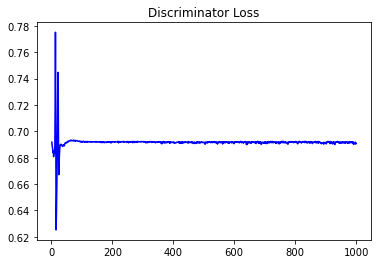

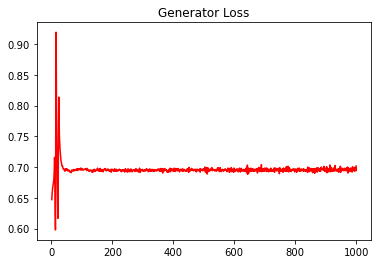

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6511726705161991


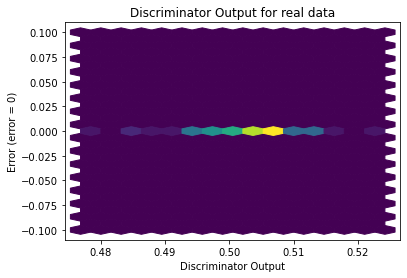

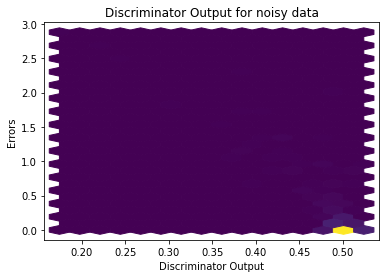

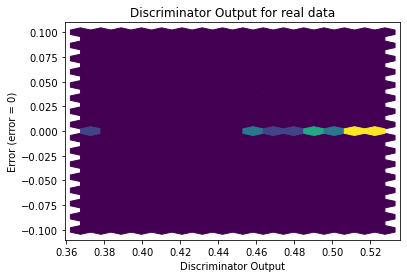

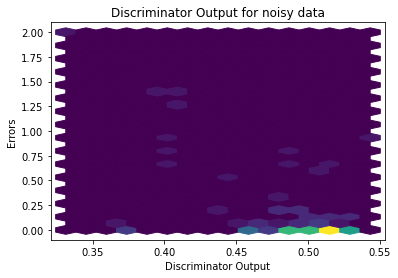

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


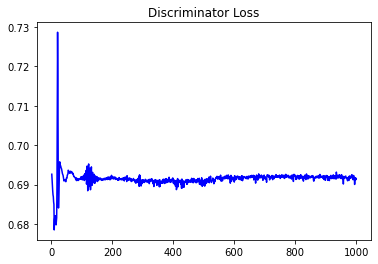

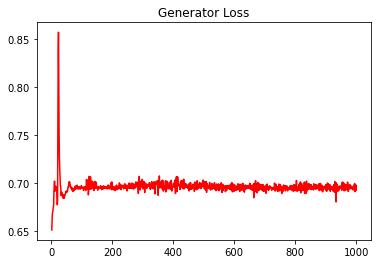

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5954762333258502


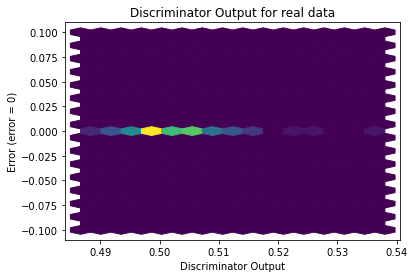

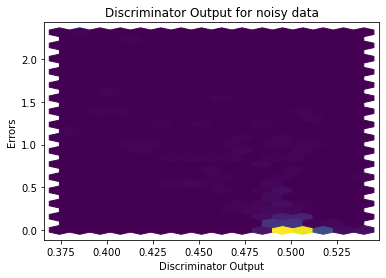

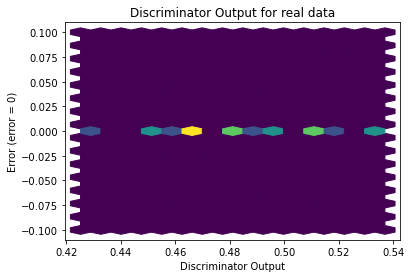

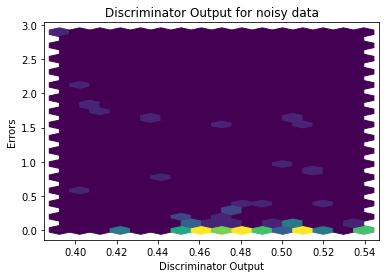

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7355]], requires_grad=True)
